### PyFVCOM plotting tools examples

Here, we demonstrate plotting in three different dimensions: horizontal space, vertical space and time.

First we load some model output into an object which can be passed to a number of plotting objects. These objects have methods for plotting different aspects of the data.

For the horizontal plots, we plot the sea surface elevation across the model domain at a given time.
For the vertical plots, we take a transect through the water column temperature data and plot it.
For the time plots, we plot both a simple surface elevation time series and a time-varying water column temperature plot.


In [1]:
%matplotlib inline

In [1]:
# Load an FVCOM model output and plot a surface.
from PyFVCOM.read import FileReader
from PyFVCOM.plot import Plotter, Time, Depth
from PyFVCOM.tide import make_water_column
from cmocean import cm
import matplotlib.pyplot as plt

No MPI some functions will be disabled (c:\tools\github\pyfvcom\PyFVCOM\tide.py:41)
No mpl_toolkits found in this python installation. Some functions will be disabled. (c:\tools\github\pyfvcom\PyFVCOM\plot.py:40)


In [3]:
# Create an object which holds the model outputs. We're only loading
# surface elevation and temperature for the first 200 time steps.
fvcom = FileReader('sample.nc', dims={'time': range(200)}, variables=['zeta', 'temp'])

"is" with a literal. Did you mean "=="? (c:\tools\github\pyfvcom\PyFVCOM\read.py:1804)
"is" with a literal. Did you mean "=="? (c:\tools\github\pyfvcom\PyFVCOM\read.py:1809)
"is" with a literal. Did you mean "=="? (c:\tools\github\pyfvcom\PyFVCOM\read.py:1804)
"is" with a literal. Did you mean "=="? (c:\tools\github\pyfvcom\PyFVCOM\read.py:1809)


FileNotFoundError: [Errno 2] No such file or directory: b'sample.nc'

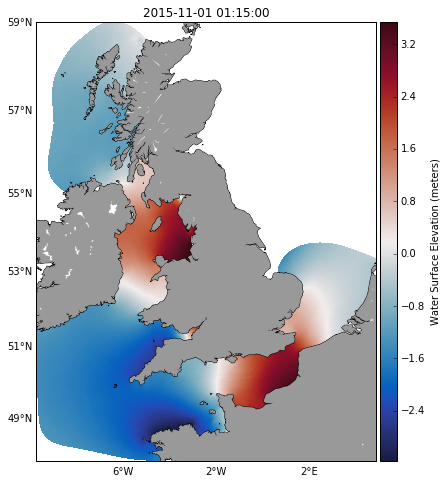

In [4]:
# Make a plot of the surface elevation.
plot = Plotter(fvcom,
               figsize=(20, 20),
               res='i',
               tick_inc=(4, 2),
               cb_label='{} ({})'.format(fvcom.atts.zeta.long_name,
                                         fvcom.atts.zeta.units),
               cmap=cm.balance)
plot.plot_field(fvcom.data.zeta[5, :])
plot.axes.set_title(fvcom.time.datetime[5].strftime('%Y-%m-%d %H:%M:%S'))

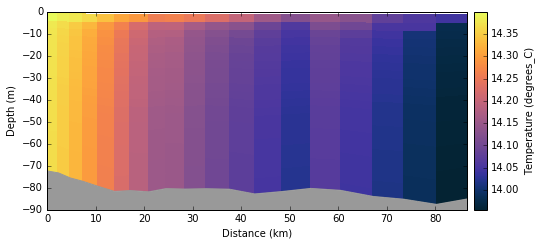

In [5]:
# Plot a temperature transect between two locations.
positions = np.array(((-5, 50), (-4.5, 49.5)))
indices, distance = fvcom.horizontal_transect_nodes(positions)
plot = Depth(fvcom, figsize=(20, 9), 
             cb_label='Temperature ({})'.format(fvcom.ds.variables['temp'].units),
             cmap=cm.thermal)
# fill_seabed makes the part of the plot below the seabed grey.
plot.plot_slice(distance / 1000,  # to kilometres from metres
                fvcom.grid.siglay_z[:, indices],
                fvcom.data.temp[4, :, indices],
                fill_seabed=True)
plot.axes.set_xlim(right=(distance / 1000).max())  # set the x-axis to the data range
plot.axes.set_xlabel('Distance (km)')
plot.axes.set_ylabel('Depth (m)')
# Save the figure.
plot.figure.savefig('temperature_profile.png')

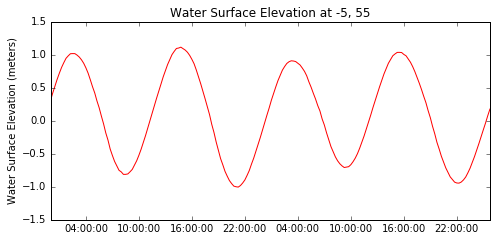

In [6]:
# Do a time series at a specific location.
gauge = (-5, 55)  # a sample (lon, lat) position
index = fvcom.closest_node(gauge)
time = Time(fvcom, figsize=(20, 9), title='{} at {}, {}'.format(fvcom.atts.zeta.long_name,
                                                                *gauge))
time.plot_line(fvcom.data.zeta[:, index], color='r')
time.axes.set_ylabel('{} ({})'.format(fvcom.atts.zeta.long_name,
                                      fvcom.atts.zeta.units))

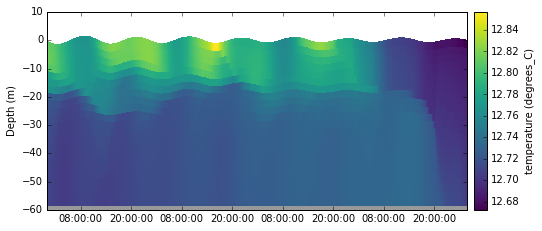

In [7]:
# Plot a depth-varying time profile through a water column
fvcom = FileReader('sample.nc', variables=['temp', 'zeta'], dims={'time': range(400), 'node': [5000]})
time = Time(fvcom, figsize=(20, 9), cb_label='{} ({})'.format(fvcom.atts.temp.long_name,
                                                              fvcom.atts.temp.units))
z = make_water_column(fvcom.data.zeta, fvcom.grid.h, fvcom.grid.siglay)
# fill_seabed makes the part of the plot below the seabed grey.
# We need to squeeze the data array since we've only extracted a single
# position.
time.plot_surface(z, np.squeeze(fvcom.data.temp), fill_seabed=True)
time.axes.set_ylabel('Depth (m)')